In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

In [ ]:
!pip3 install pycaret
import pycaret
pycaret.__version__

In [2]:
import pandas as pd
import numpy as np
# fetch dataset 
from ucimlrepo import fetch_ucirepo

# Fetch dataset 
try:
    bank_marketing = fetch_ucirepo(id=222)
except Exception as e:
    print(f"Error: {e}")

In [3]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
Y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 

from pycaret.classification import *

# Assuming 'data_dict' is the dictionary containing the data
features = bank_marketing['data']['features']
targets = bank_marketing['data']['targets']

# Combine features and targets into a single DataFrame
df = pd.concat([features, targets], axis=1)

# Initialize PyCaret
s = setup(df, target='y', train_size=0.8, session_id=222, log_experiment=True)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

,Description,Value
0,Session id,222
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(36168, 44)"
7,Transformed test set shape,"(9043, 44)"
8,Ordinal features,4
9,Numeric features,7


In [4]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

# check the type of exp
type(exp)

# init setup on exp
exp.setup(df, target = 'y', session_id = 222)

,Description,Value
0,Session id,222
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 44)"
6,Transformed train set shape,"(31647, 44)"
7,Transformed test set shape,"(13564, 44)"
8,Ordinal features,4
9,Numeric features,7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9071,0.9296,0.9071,0.8979,0.9005,0.4898,0.4978,2.4100
rf,Random Forest Classifier,0.9042,0.9210,0.9042,0.8909,0.8922,0.4284,0.4496,3.9540
gbc,Gradient Boosting Classifier,0.9041,0.9199,0.9041,0.8918,0.8939,0.4434,0.4596,4.6380
lda,Linear Discriminant Analysis,0.8998,0.9021,0.8998,0.8900,0.8933,0.4549,0.4612,0.9700
lr,Logistic Regression,0.8996,0.8961,0.8996,0.8836,0.8845,0.3798,0.4072,4.3020
ridge,Ridge Classifier,0.8993,0.0000,0.8993,0.8827,0.8801,0.3445,0.3859,0.6510
et,Extra Trees Classifier,0.8986,0.9029,0.8986,0.8828,0.8848,0.3857,0.4085,4.4310
ada,Ada Boost Classifier,0.8984,0.9059,0.8984,0.8834,0.8863,0.3987,0.4167,1.7500
dummy,Dummy Classifier,0.8830,0.5000,0.8830,0.7797,0.8282,0.0000,0.0000,0.6550
knn,K Neighbors Classifier,0.8817,0.7623,0.8817,0.8597,0.8662,0.2879,0.3039,1.5960


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9087,0.9333,0.9087,0.8982,0.9002,0.4804,0.4934
1,0.9081,0.9371,0.9081,0.8997,0.9023,0.5015,0.5077
2,0.9011,0.9278,0.9011,0.8930,0.8960,0.4735,0.4775
3,0.9109,0.9348,0.9109,0.9034,0.9059,0.5213,0.5267
4,0.9030,0.9238,0.9030,0.8923,0.8954,0.4599,0.4690
5,0.9021,0.9150,0.9021,0.8934,0.8965,0.4752,0.4801
6,0.9071,0.9287,0.9071,0.8959,0.8980,0.4678,0.4822
7,0.9099,0.9409,0.9099,0.9009,0.9033,0.5026,0.5113
8,0.9112,0.9304,0.9112,0.9032,0.9057,0.5186,0.5250


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9052,0.9286,0.9052,0.8937,0.8962,0.4584,0.4715
1,0.9033,0.9292,0.9033,0.8924,0.8955,0.4595,0.4691
2,0.9027,0.9210,0.9027,0.8937,0.8969,0.4745,0.4799
3,0.9077,0.9285,0.9077,0.8984,0.9010,0.4911,0.4994
4,0.9027,0.9195,0.9027,0.8909,0.8939,0.4485,0.4600
5,0.8964,0.9063,0.8964,0.8848,0.8887,0.4284,0.4359
6,0.9055,0.9212,0.9055,0.8935,0.8954,0.4519,0.4683
7,0.9064,0.9343,0.9064,0.8963,0.8990,0.4786,0.4882
8,0.9128,0.9253,0.9128,0.9039,0.9058,0.5138,0.5241


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


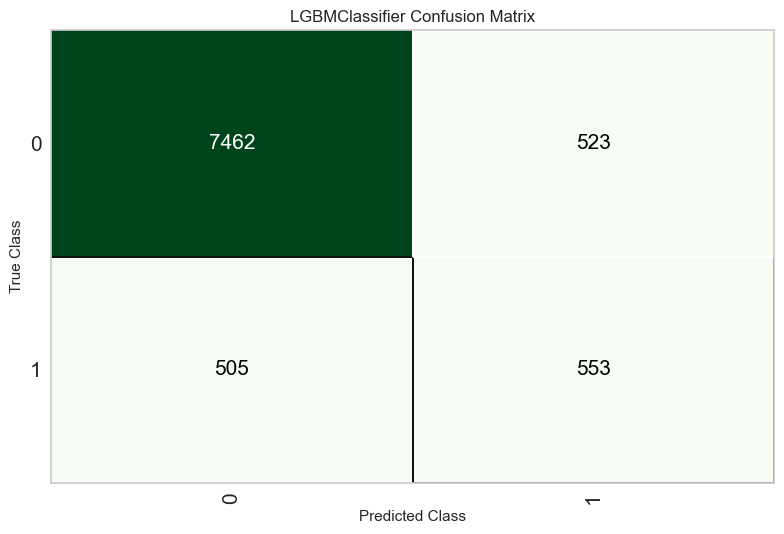

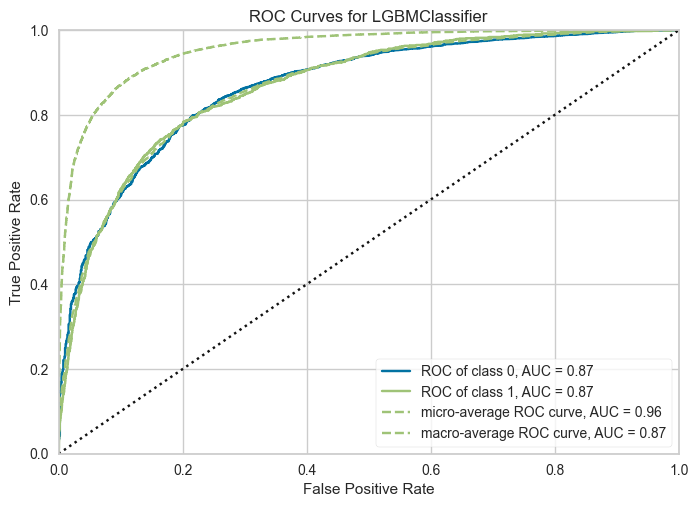

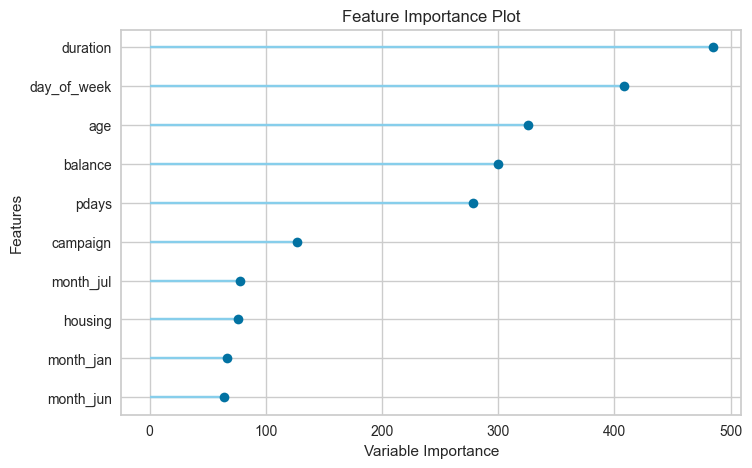

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9278,0.9542,0.9278,0.9222,0.9230,0.6062,0.6148


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
15850,55,management,married,primary,no,57,no,yes,cellular,21,jul,162,2,-1,0,NaN,no,no,0.9957
37297,44,blue-collar,divorced,secondary,no,338,yes,no,cellular,13,may,133,1,370,1,failure,no,no,0.9951
24975,50,services,married,primary,no,2603,no,no,cellular,18,nov,114,1,-1,0,NaN,no,no,0.9907
41093,35,technician,married,secondary,no,1577,yes,yes,cellular,17,aug,80,1,273,1,failure,no,no,0.9834
44561,35,management,divorced,tertiary,no,2885,no,no,cellular,13,aug,199,3,43,8,other,yes,no,0.5995


In [5]:
# Compare models and select the best ones
best_model = exp.compare_models()

# Choose best model from compare_models to create and tune final model
model = exp.create_model('lightgbm')
tuned_model = exp.tune_model(model)

# Finalize the model
final_model = exp.finalize_model(tuned_model)

# plot confusion matrix
plot_model(final_model, plot = 'confusion_matrix')

# plot AUC
plot_model(final_model, plot = 'auc')

# plot feature importance
plot_model(final_model, plot = 'feature')

# check docstring to see available plots 
help(plot_model)

exp.evaluate_model(final_model)

# predict on test set
holdout_pred = exp.predict_model(final_model)

# show predictions df
holdout_pred.head()

In [6]:
# Copy the 'original' DataFrame
new_data = bank_marketing['data']['original'].copy()

# Drop multiple columns (e.g., 'column1' and 'column2')

new_data.drop('y', axis=1, inplace=True)

# Display the first few rows of the new DataFrame
new_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [10]:
# predict model on new_data
predictions = predict_model(final_model, data = new_data)
exp.evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
# predict on the test set
holdout_pred = exp.predict_model(final_model)

# show predictions df
holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9278,0.9542,0.9278,0.9222,0.9230,0.6062,0.6148


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,prediction_label,prediction_score
15850,55,management,married,primary,no,57,no,yes,cellular,21,jul,162,2,-1,0,NaN,no,no,0.9957
37297,44,blue-collar,divorced,secondary,no,338,yes,no,cellular,13,may,133,1,370,1,failure,no,no,0.9951
24975,50,services,married,primary,no,2603,no,no,cellular,18,nov,114,1,-1,0,NaN,no,no,0.9907
41093,35,technician,married,secondary,no,1577,yes,yes,cellular,17,aug,80,1,273,1,failure,no,no,0.9834
44561,35,management,divorced,tertiary,no,2885,no,no,cellular,13,aug,199,3,43,8,other,yes,no,0.5995


In [12]:
# save pipeline
exp.save_model(final_model, 'my_first_pipeline')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_true = df['y']
y_pred = predictions['prediction_label']
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy is: ', accuracy)


precision = precision_score(y_true, y_pred, average='weighted') 
recall = recall_score(y_true, y_pred, average='weighted') 
f1 = f1_score(y_true, y_pred, average='weighted')

print('Precision is: ', precision) 
print('Recall is: ', recall) 
print('F1 score is: ', f1)

Transformation Pipeline and Model Successfully Saved
Accuracy is:  0.9270752692928712
Precision is:  0.9215099067991389
Recall is:  0.9270752692928712
F1 score is:  0.9226028715474985


In [13]:
# Identify feature types
feature_types = df.dtypes

# Print feature types
print(feature_types)


age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object


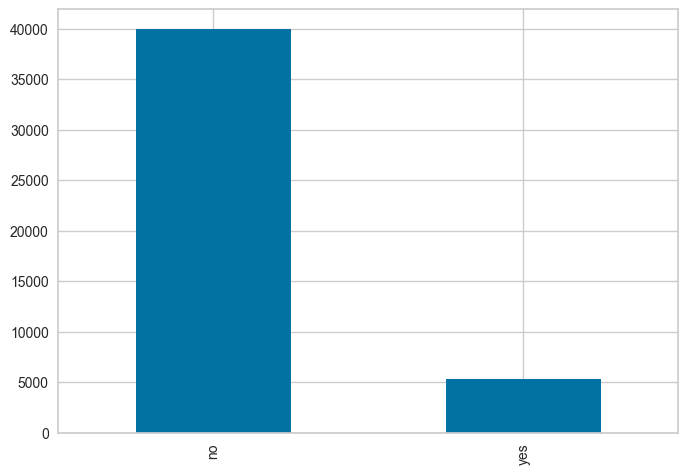

In [14]:
import matplotlib.pyplot as plt

# Example: Visualize the distribution of the target variable 'y'
df['y'].value_counts().plot(kind='bar')
plt.show()
